In [315]:
import numpy as np
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [316]:
#create two classes 0 and 1
data_c = [1]*10
for c in range(1000): 
    data_c.append(0)
random.shuffle(data_c) #shuffle

In [317]:
#create random values
data_v = []
for i in range(len(data_c)):
    data_v.append([random.random(),random.random()]) #random float number between 0 and 1

In [318]:
#zip all together
data = pd.DataFrame(data_v, columns = ['value1', 'value2'])

In [319]:
data['class'] = data_c
data

,value1,value2,class
0,0.654074,0.645322,0
1,0.006947,0.039630,0
2,0.024942,0.781044,0
3,0.953657,0.284663,0
4,0.519795,0.897539,0
...,...,...,...
1005,0.889371,0.007811,0
1006,0.358826,0.650595,0
1007,0.356986,0.591435,0
1008,0.102035,0.624412,0


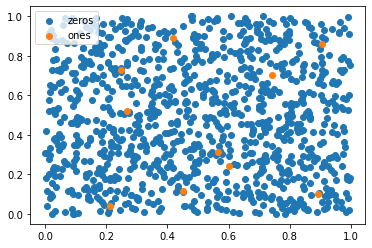

In [320]:
# scatter plot of examples by class label

plt.scatter(data[data['class'] == 0]['value1'], data[data['class'] == 0]['value2'], label='zeros')
plt.scatter(data[data['class'] != 0]['value1'], data[data['class'] != 0]['value2'], label='ones')

plt.legend()
plt.show()

In [321]:
#arrays from columns
X = data[['value1','value2']] #values
y = data['class'] #associated classes

In [322]:
X

,value1,value2
0,0.654074,0.645322
1,0.006947,0.039630
2,0.024942,0.781044
3,0.953657,0.284663
4,0.519795,0.897539
...,...,...
1005,0.889371,0.007811
1006,0.358826,0.650595
1007,0.356986,0.591435
1008,0.102035,0.624412


# under sampling

In [323]:
#for installation use conda froge channel, not pip install imbalanced-learn
# > conda install -c conda-forge imbalanced-learn

In [324]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids, NeighbourhoodCleaningRule 
from imblearn.under_sampling import EditedNearestNeighbours

### random

In [325]:
samp = RandomUnderSampler()
X_res, y_res = samp.fit_resample(X, y)

In [327]:
y_res

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: class, dtype: int64

In [328]:
X_res['class'] = y_res
X_res.head()

,value1,value2,class
0,0.485556,0.705010,0
1,0.903016,0.958749,0
2,0.937133,0.286650,0
3,0.563988,0.442798,0
4,0.540347,0.492890,0


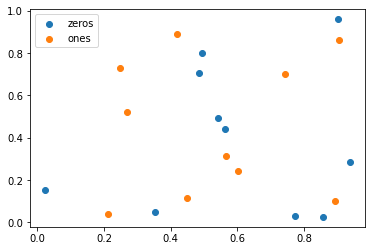

In [329]:
plt.scatter(X_res[X_res['class'] == 0]['value1'], X_res[X_res['class'] == 0]['value2'], label='zeros')
plt.scatter(X_res[X_res['class'] != 0]['value1'], X_res[X_res['class'] != 0]['value2'], label='ones')

plt.legend()
plt.show()

### near miss

In [330]:
samp = NearMiss()
X_res, y_res = samp.fit_resample(X, y)
X_res['class'] = y_res
X_res.head()

,value1,value2,class
0,0.572668,0.267104,0
1,0.559936,0.297177,0
2,0.590423,0.212740,0
3,0.579181,0.303466,0
4,0.526178,0.272797,0


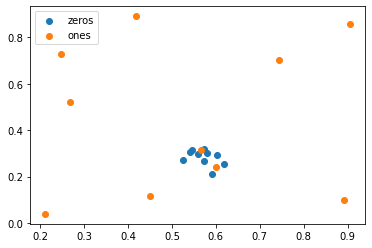

In [331]:
plt.scatter(X_res[X_res['class'] == 0]['value1'], X_res[X_res['class'] == 0]['value2'], label='zeros')
plt.scatter(X_res[X_res['class'] != 0]['value1'], X_res[X_res['class'] != 0]['value2'], label='ones')

plt.legend()
plt.show()

### cluster centroids

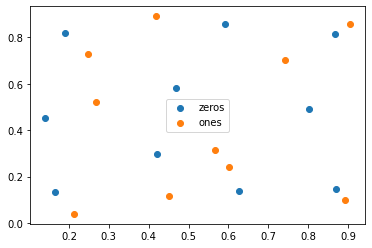

In [332]:
samp = ClusterCentroids()
X_res, y_res = samp.fit_resample(X, y)
X_res['class'] = y_res
X_res.head()

plt.scatter(X_res[X_res['class'] == 0]['value1'], X_res[X_res['class'] == 0]['value2'], label='zeros')
plt.scatter(X_res[X_res['class'] != 0]['value1'], X_res[X_res['class'] != 0]['value2'], label='ones')

plt.legend()
plt.show()

### neighbourhood cleaning

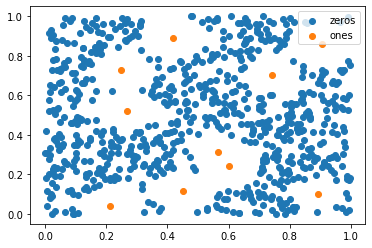

In [334]:
samp = NeighbourhoodCleaningRule(n_neighbors=30) #try 30
X_res, y_res = samp.fit_resample(X, y)
X_res['class'] = y_res
X_res.head()

plt.scatter(X_res[X_res['class'] == 0]['value1'], X_res[X_res['class'] == 0]['value2'], label='zeros')
plt.scatter(X_res[X_res['class'] != 0]['value1'], X_res[X_res['class'] != 0]['value2'], label='ones')

plt.legend()
plt.show()

### edited nearest neighbours

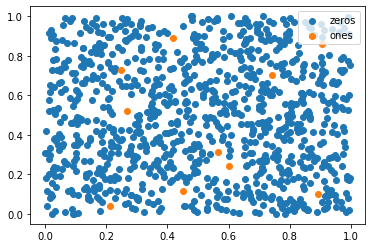

In [336]:
samp = EditedNearestNeighbours(n_neighbors=3) #try 3
X_res, y_res = samp.fit_resample(X, y)
X_res['class'] = y_res
X_res.head()

plt.scatter(X_res[X_res['class'] == 0]['value1'], X_res[X_res['class'] == 0]['value2'], label='zeros')
plt.scatter(X_res[X_res['class'] != 0]['value1'], X_res[X_res['class'] != 0]['value2'], label='ones')

plt.legend()
plt.show()

## over sampling

In [296]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

### random

In [338]:
# tired of typing the same, let's create a function:
def view_sampling (method, X, y):
    X_res, y_res = method.fit_resample(X, y)
    X_res['class'] = y_res

    plt.scatter(X_res[X_res['class'] == 0]['value1'], X_res[X_res['class'] == 0]['value2'], label='zeros')
    plt.scatter(X_res[X_res['class'] != 0]['value1'], X_res[X_res['class'] != 0]['value2'], label='ones')
    title = str(str(method)+', minority = '+str(sum(y_res)))
    plt.title(title)
    plt.legend()
    plt.show()

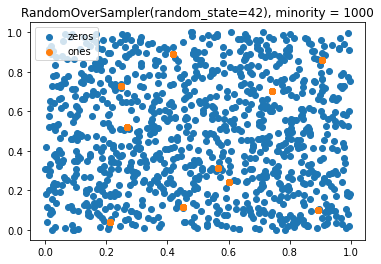

In [339]:
view_sampling(RandomOverSampler(random_state=42), X, y)

### SMOTE (Synthetic Minority Over-sampling Technique)

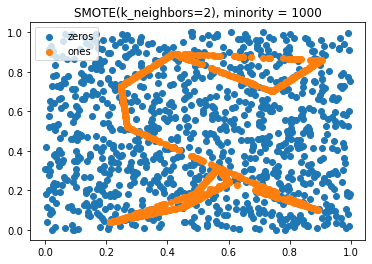

In [346]:
view_sampling(SMOTE(k_neighbors=2), X, y)

### ADASYN (similar to SMOTE but it generates different number of samples depending on an estimate of the local distribution of the class to be oversampled)

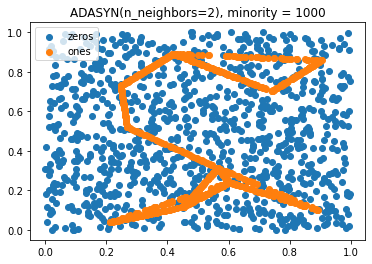

In [347]:
view_sampling(ADASYN(n_neighbors=2), X, y)

## Combination of both, over- and under- sampling

In [301]:
from  imblearn.combine import SMOTEENN, SMOTETomek

### SMOTE + Edited Nearest Neighbours

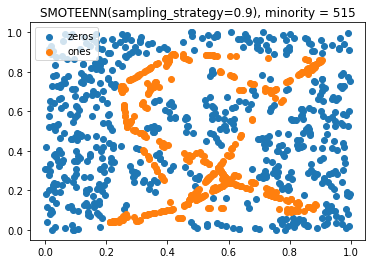

In [349]:
view_sampling(SMOTEENN(sampling_strategy=0.9), X, y) #try 0.9

### SMOTE + Tomek (remove two samples that are the nearest neighbors of each other)

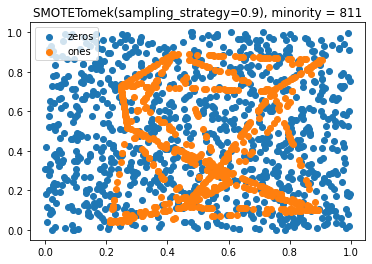

In [352]:
view_sampling(SMOTETomek(sampling_strategy=0.9), X, y)